In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
train=pd.read_csv("Training Data.csv")
test=pd.read_csv("Test Data.csv")
train.shape, test.shape

((6296, 18), (1080, 18))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         6296 non-null   int64  
 1   Candidate Ref                6296 non-null   int64  
 2   DOJ Extended                 6296 non-null   object 
 3   Duration to accept offer     6296 non-null   int64  
 4   Notice period                6296 non-null   int64  
 5   Offered band                 6296 non-null   object 
 6   Pecent hike expected in CTC  6296 non-null   float64
 7   Percent hike offered in CTC  6296 non-null   float64
 8   Percent difference CTC       6296 non-null   float64
 9   Joining Bonus                6296 non-null   object 
 10  Candidate relocate actual    6296 non-null   object 
 11  Gender                       6296 non-null   object 
 12  Candidate Source             6296 non-null   object 
 13  Rex in Yrs        

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         1080 non-null   int64  
 1   Candidate Ref                1080 non-null   int64  
 2   DOJ Extended                 1080 non-null   object 
 3   Duration to accept offer     1080 non-null   int64  
 4   Notice period                1080 non-null   int64  
 5   Offered band                 1080 non-null   object 
 6   Pecent hike expected in CTC  1080 non-null   float64
 7   Percent hike offered in CTC  1080 non-null   float64
 8   Percent difference CTC       1080 non-null   float64
 9   Joining Bonus                1080 non-null   object 
 10  Candidate relocate actual    1080 non-null   object 
 11  Gender                       1080 non-null   object 
 12  Candidate Source             1080 non-null   object 
 13  Rex in Yrs        

In [6]:
train.drop(["SLNO","Candidate Ref"], axis=1, inplace=True)
test.drop(["SLNO","Candidate Ref"], axis=1, inplace=True)

In [7]:
train.head()

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
2,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
3,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
4,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined


In [8]:
test.head()

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,37,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,32,Joined
1,No,3,0,E2,28.21,37.18,7.00,No,No,Male,Employee Referral,7,INFRA,Chennai,34,Joined
2,No,1,0,E2,30.00,30.00,0.00,No,No,Male,Direct,6,INFRA,Noida,34,Joined
3,Yes,18,90,E2,33.33,211.11,133.33,No,No,Male,Agency,6,ERS,Hyderabad,23,Not Joined
4,No,0,0,E1,11.11,-16.67,-25.00,No,No,Female,Direct,1,INFRA,Noida,24,Joined


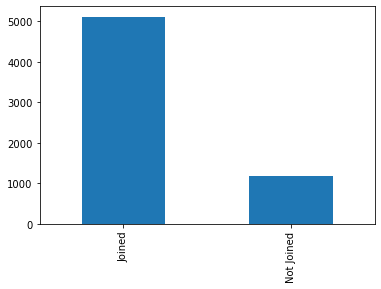

In [9]:
train["Status"].value_counts().plot(kind="bar");

In [10]:
encoder=LabelEncoder()
train["Status"]=encoder.fit_transform(train["Status"])
test["Status"]=encoder.fit_transform(test["Status"])
encoder.classes_

array(['Joined', 'Not Joined'], dtype=object)

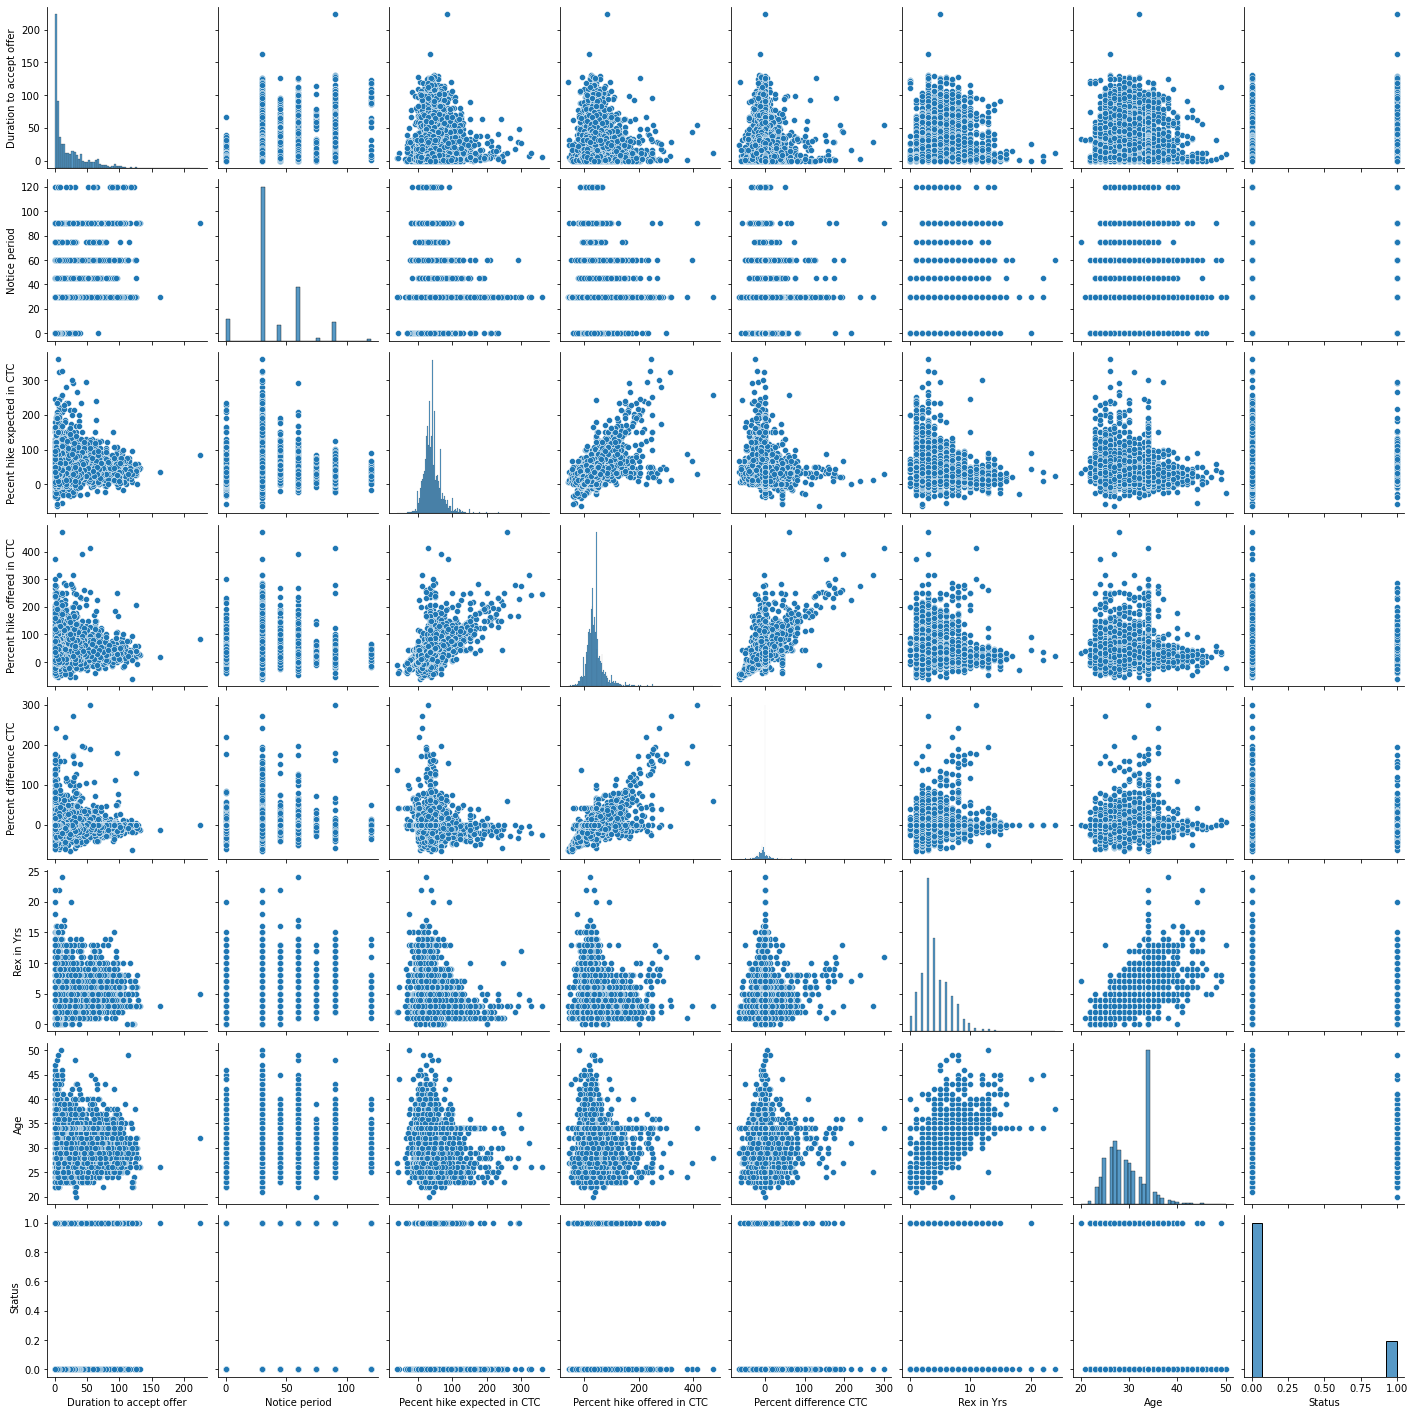

In [11]:
sns.pairplot(train);

In [12]:
train["Offered band"].value_counts(),test["Offered band"].value_counts()

(E1    3916
 E2    1853
 E3     373
 E0     154
 Name: Offered band, dtype: int64,
 E1    642
 E2    361
 E3     46
 E0     31
 Name: Offered band, dtype: int64)

In [13]:
train["Candidate Source"].value_counts(),test["Candidate Source"].value_counts()

(Direct               3358
 Agency               1825
 Employee Referral    1113
 Name: Candidate Source, dtype: int64,
 Direct               584
 Agency               285
 Employee Referral    211
 Name: Candidate Source, dtype: int64)

In [14]:
train["LOB"].value_counts(),test["LOB"].value_counts()

(INFRA         1955
 ERS           1725
 BFSI           983
 ETS            467
 CSMP           429
 AXON           400
 EAS            234
 Healthcare      89
 MMS             14
 Name: LOB, dtype: int64,
 INFRA         357
 ERS           286
 BFSI          159
 ETS            97
 AXON           66
 CSMP           57
 EAS            46
 Healthcare     12
 Name: LOB, dtype: int64)

In [15]:
train["Location"].value_counts(),test["Location"].value_counts()

(Chennai      2211
 Noida        1887
 Bangalore    1584
 Hyderabad     245
 Mumbai        127
 Gurgaon       105
 Kolkata        85
 Pune           32
 Cochin          8
 Others          8
 Ahmedabad       4
 Name: Location, dtype: int64,
 Chennai      361
 Noida        353
 Bangalore    261
 Hyderabad     47
 Mumbai        25
 Kolkata       15
 Gurgaon       11
 Pune           5
 Others         2
 Name: Location, dtype: int64)

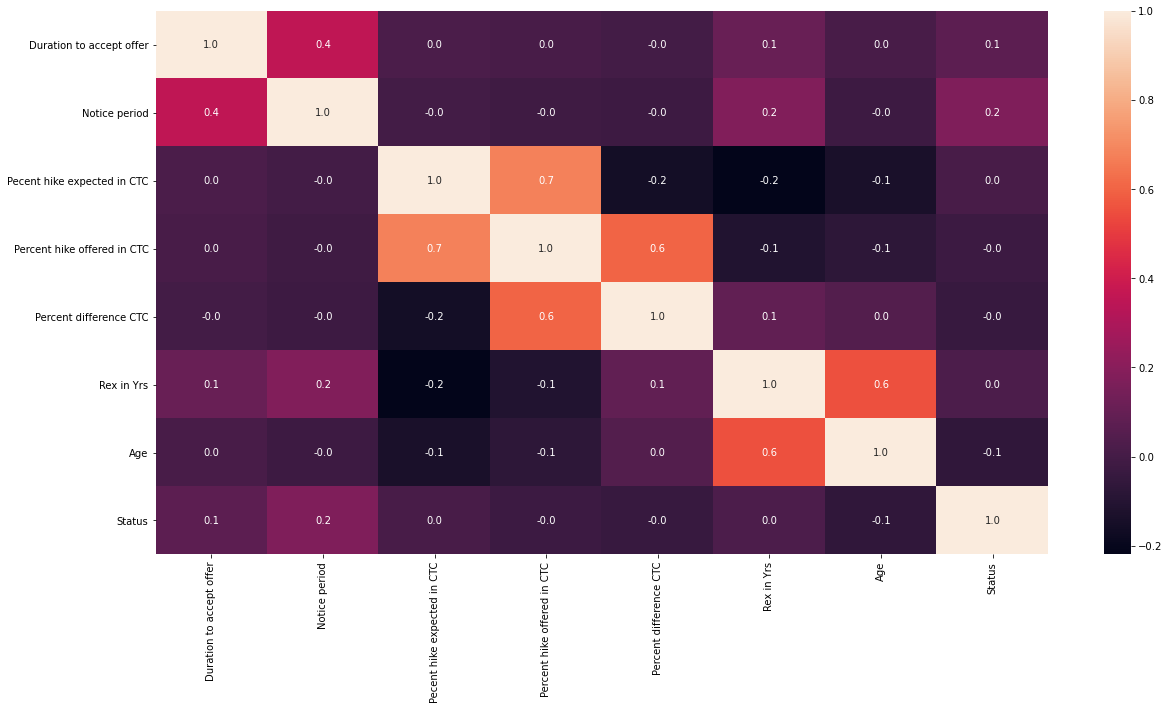

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True, fmt="0.1f");

In [17]:
t=test.copy()

In [18]:
test["Status"]=-1

In [19]:
data=pd.concat((train,test), axis=0)
data.shape

(7376, 16)

In [20]:
data=pd.get_dummies(data)

In [21]:
test=data[data["Status"]==-1]
train=data[data["Status"]!=-1]

In [22]:
test["Status"]=t["Status"]
test.head()

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Status,DOJ Extended_No,DOJ Extended_Yes,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,37,30,31.58,31.58,0.00,7,32,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3,0,28.21,37.18,7.00,7,34,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,30.00,30.00,0.00,6,34,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,18,90,33.33,211.11,133.33,6,23,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,11.11,-16.67,-25.00,1,24,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
y_train=train["Status"]
x_train=train.drop("Status", axis=1)
y_test=test["Status"]
x_test=test.drop("Status", axis=1)

In [24]:
lr=LogisticRegression()
dec_tree=DecisionTreeClassifier()
ran_for=RandomForestClassifier()
xgb=XGBClassifier(learning_rate=0.01)
models=[lr,dec_tree,ran_for,xgb]

def accuracy(models):
    for i in models:
        score=cross_val_score(i,x_train,y_train,cv=5)
        print("{}:{}".format(i,np.mean(score)))


In [25]:
accuracy(models)

LogisticRegression():0.8136903816331934
DecisionTreeClassifier():0.7357035692222349
RandomForestClassifier():0.8138491117919235
[22:05:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

In [33]:
lr.fit(x_train,y_train)
lr_pred=lr.predict_proba(x_test)[:,1]
accuracy_score(y_test,lr.predict(x_test))

0.8148148148148148

In [34]:
ran_for=RandomForestClassifier()
ran_for.fit(x_train,y_train)
ran_pred=ran_for.predict_proba(x_test)[:,1]
accuracy_score(y_test,ran_for.predict(x_test))

0.825

In [35]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict_proba(x_test)[:,1]
accuracy_score(y_test,xgb.predict(x_test))

[22:08:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8231481481481482

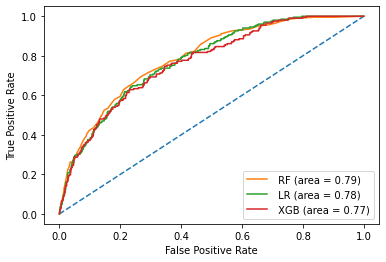

In [42]:
from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, lr_thresholds=roc_curve(y_test, lr_pred)
ran_fpr, ran_tpr, ran_thresholds=roc_curve(y_test, ran_pred)
xgb_fpr, xgb_tpr, xgb_thresholds=roc_curve(y_test, xgb_pred)
plt.plot([0,1],[0,1],"--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot(ran_fpr, ran_tpr,label= " RF (area = {})" .format(round(roc_auc_score(y_test,ran_pred),2)))
plt.plot(lr_fpr, lr_tpr, label=" LR (area = {})" .format(round(roc_auc_score(y_test,lr_pred),2)))
plt.plot(xgb_fpr,xgb_tpr, label=" XGB (area = {})" .format(round(roc_auc_score(y_test,xgb_pred),2)))
plt.legend();

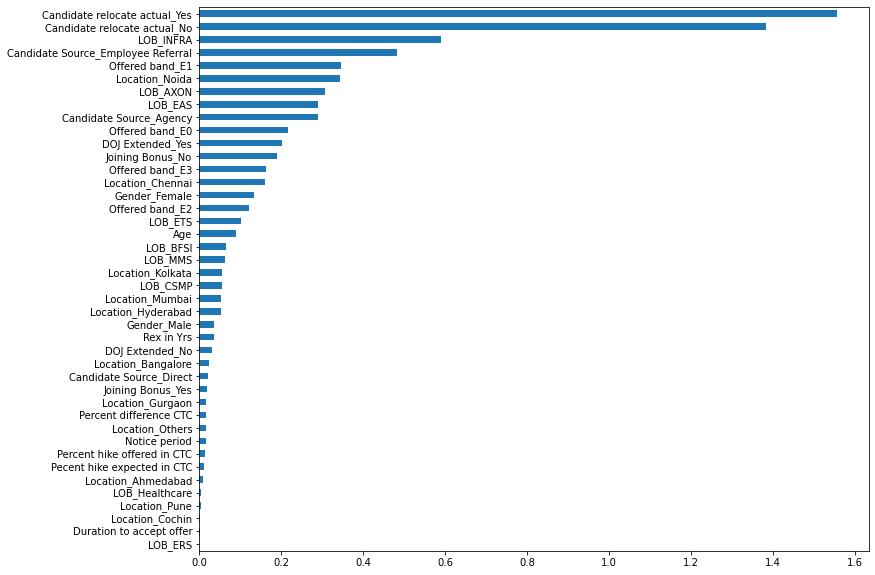

In [43]:
coefficients=lr.coef_
feature_importance = pd.Series(coefficients[0],
                               index=x_train.columns)
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh(figsize=(12,10));

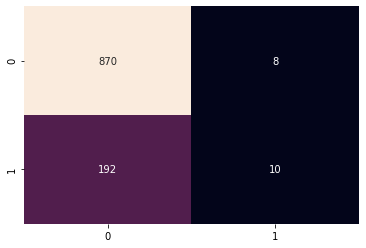

In [47]:
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)), annot=True, fmt="0.0f", cbar=False);

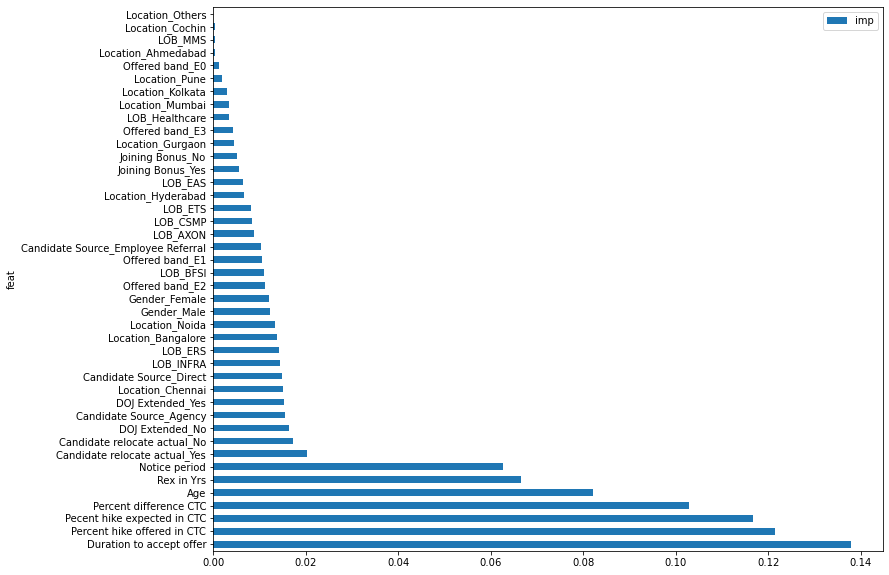

In [45]:
a=zip(x_train.columns,ran_for.feature_importances_)
feat_imp=pd.DataFrame(a)
feat_imp.columns=["feat","imp"]
feat_imp=feat_imp.sort_values(by="imp", ascending=False)
feat_imp.plot("feat","imp","barh", figsize=(12,10));

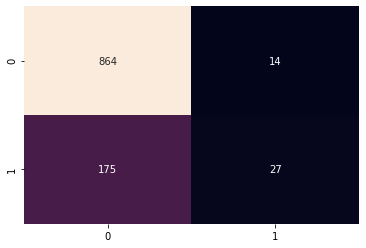

In [48]:
sns.heatmap(confusion_matrix(y_test, ran_for.predict(x_test)), annot=True, fmt="0.0f", cbar=False);

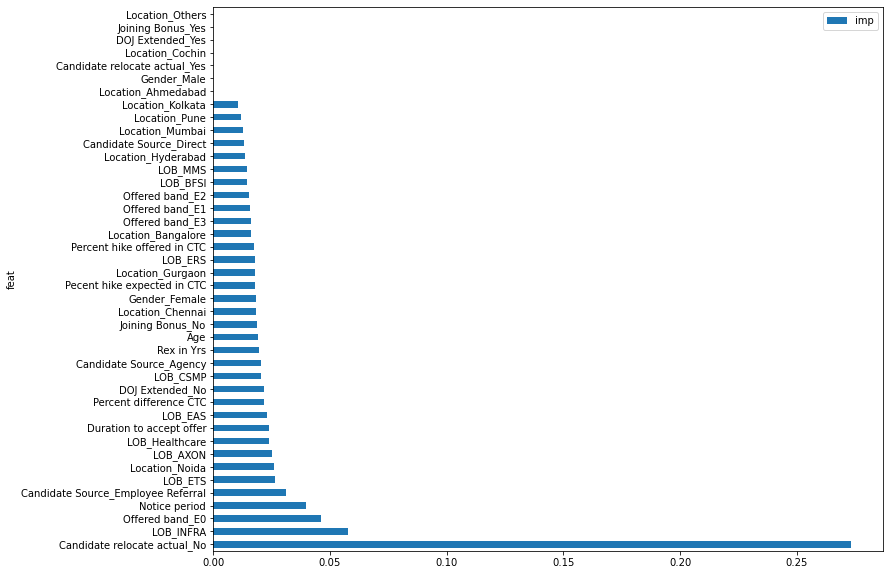

In [49]:
a=zip(x_train.columns,xgb.feature_importances_)
feat_imp=pd.DataFrame(a)
feat_imp.columns=["feat","imp"]
feat_imp=feat_imp.sort_values(by="imp", ascending=False)
feat_imp.plot("feat","imp","barh", figsize=(12,10));

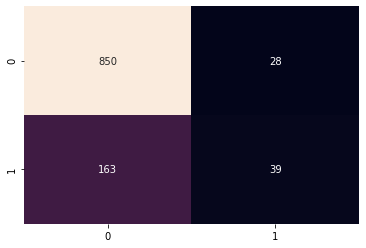

In [50]:
sns.heatmap(confusion_matrix(y_test, xgb.predict(x_test)), annot=True, fmt="0.0f", cbar=False);